In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

import torch

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-diagnostic-dataset/brca.csv")

# Examining dataset

In [3]:
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [4]:
df = df.iloc[:, 1:]

In [5]:
df.isna().sum()

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [6]:
df.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
def histplots(df, colored=False):
    k = 0
    cols = df.columns[:-1]
    n = 5
    m = 6
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for i in range(n):
        for j in range(m):
            if colored:
                sns.histplot(df, x=df[df.columns[k]], ax=axes[i][j], kde=True, hue=df.columns[-1])
            else:
                sns.histplot(df, x=df[df.columns[k]], ax=axes[i][j], kde=True, color='g')
            k += 1

    plt.tight_layout()
    plt.show()

In [8]:
def boxplots(df):
    k = 0
    cols = df.columns[:-1]
    n = 5
    m = 6
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for i in range(n):
        for j in range(m):
            sns.boxplot(df, x=df[df.columns[k]], ax=axes[i][j])
            k += 1

    plt.tight_layout()
    plt.show()

# Detecting outliers on boxplots and histograms

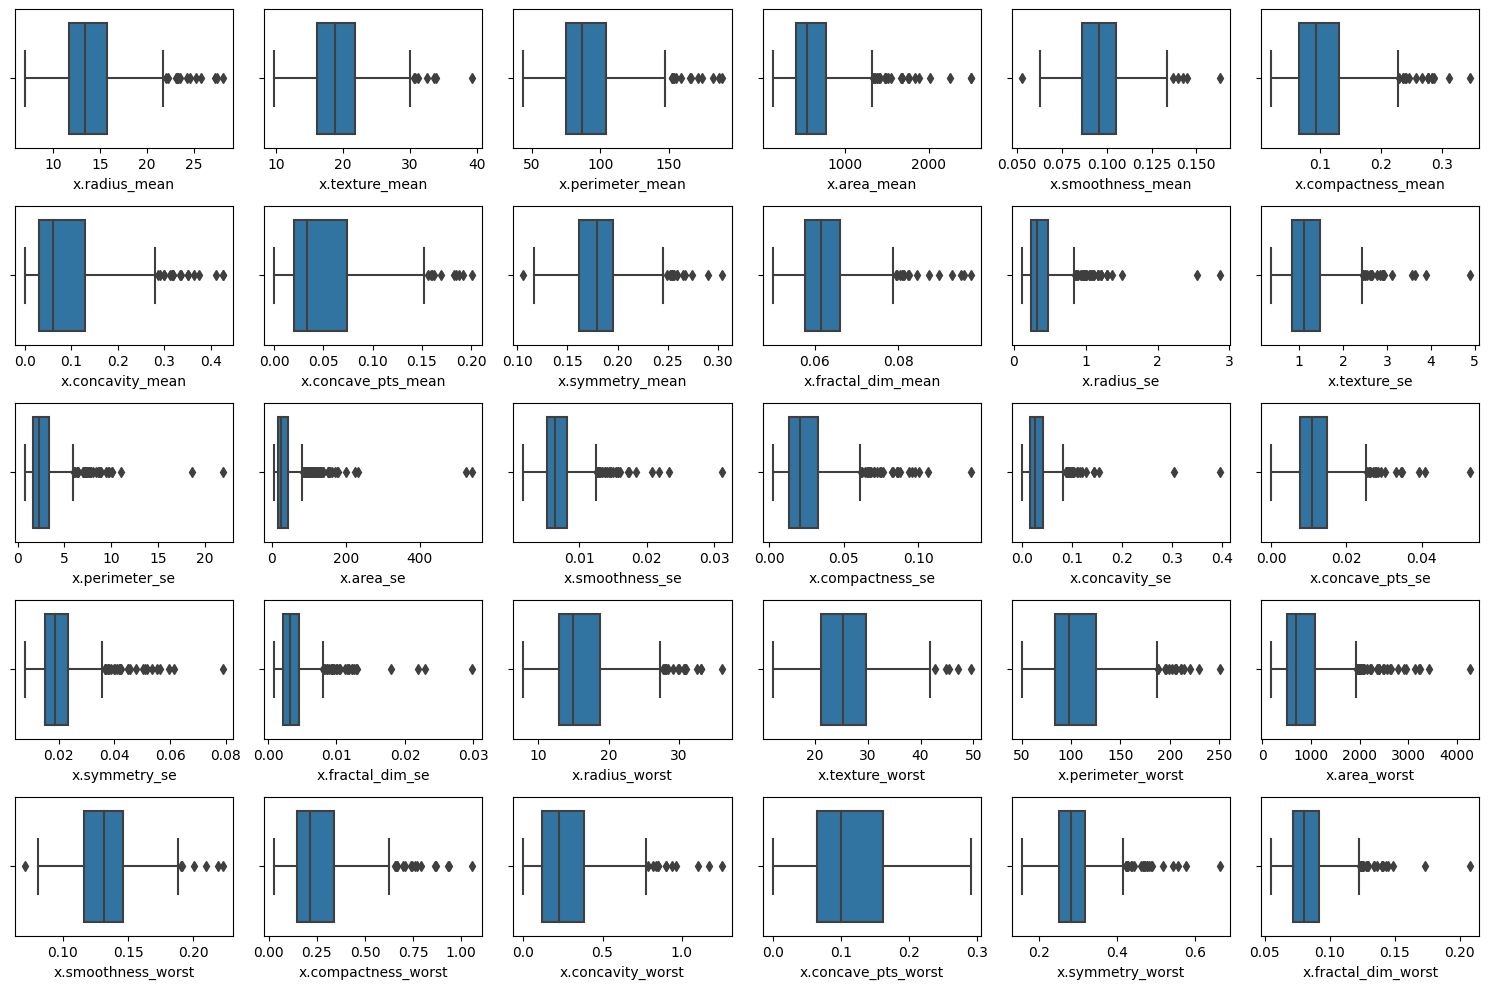

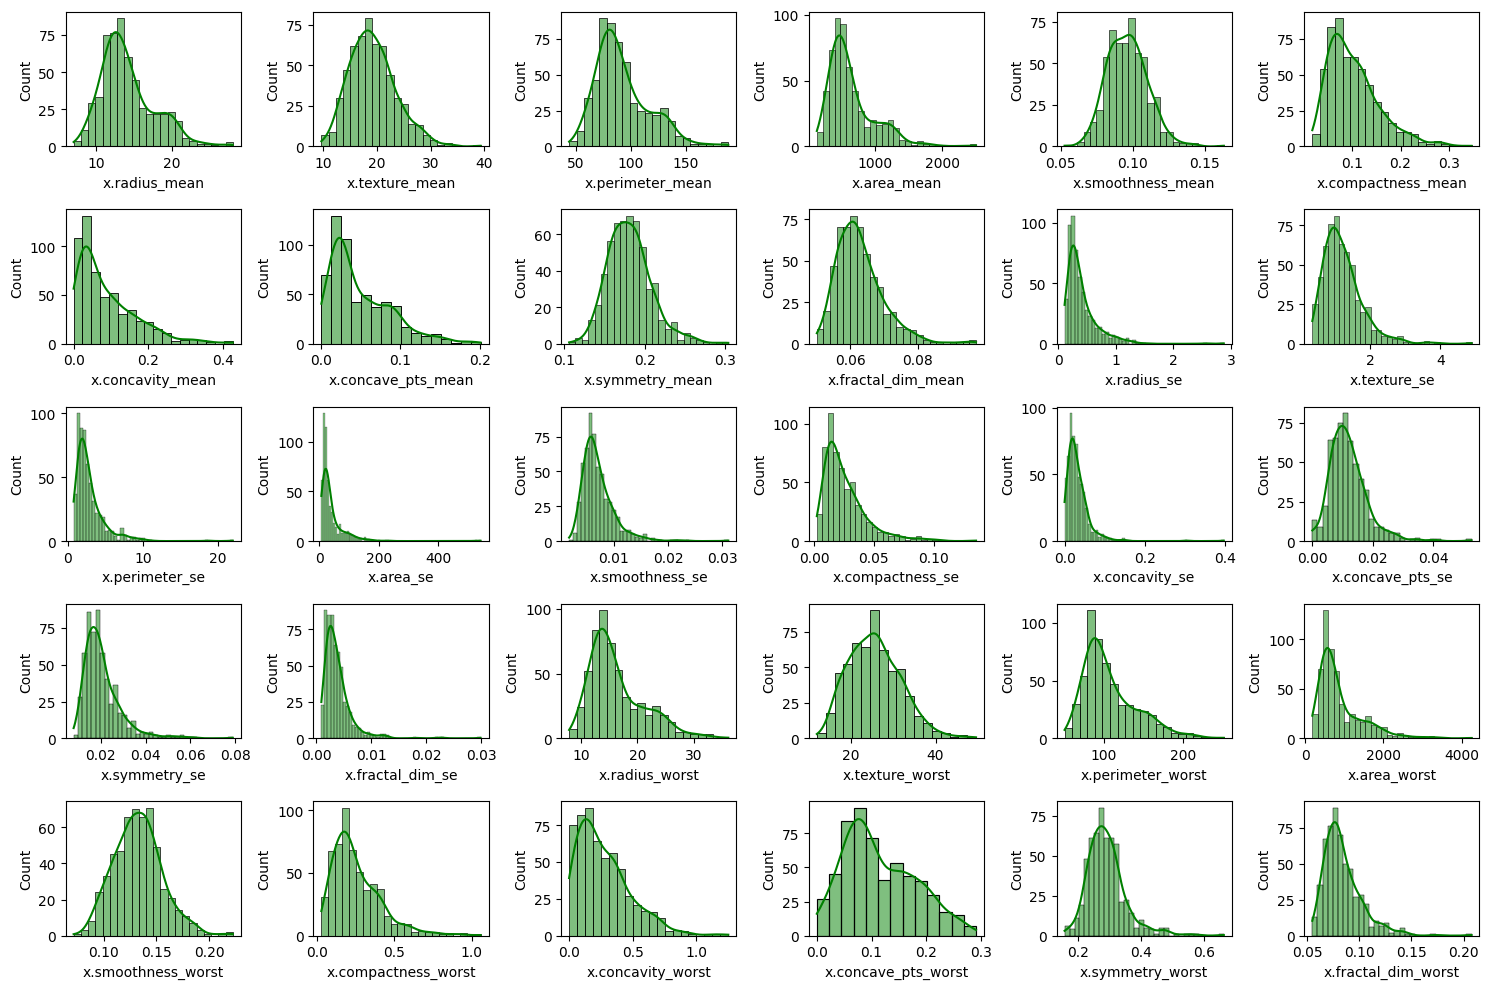

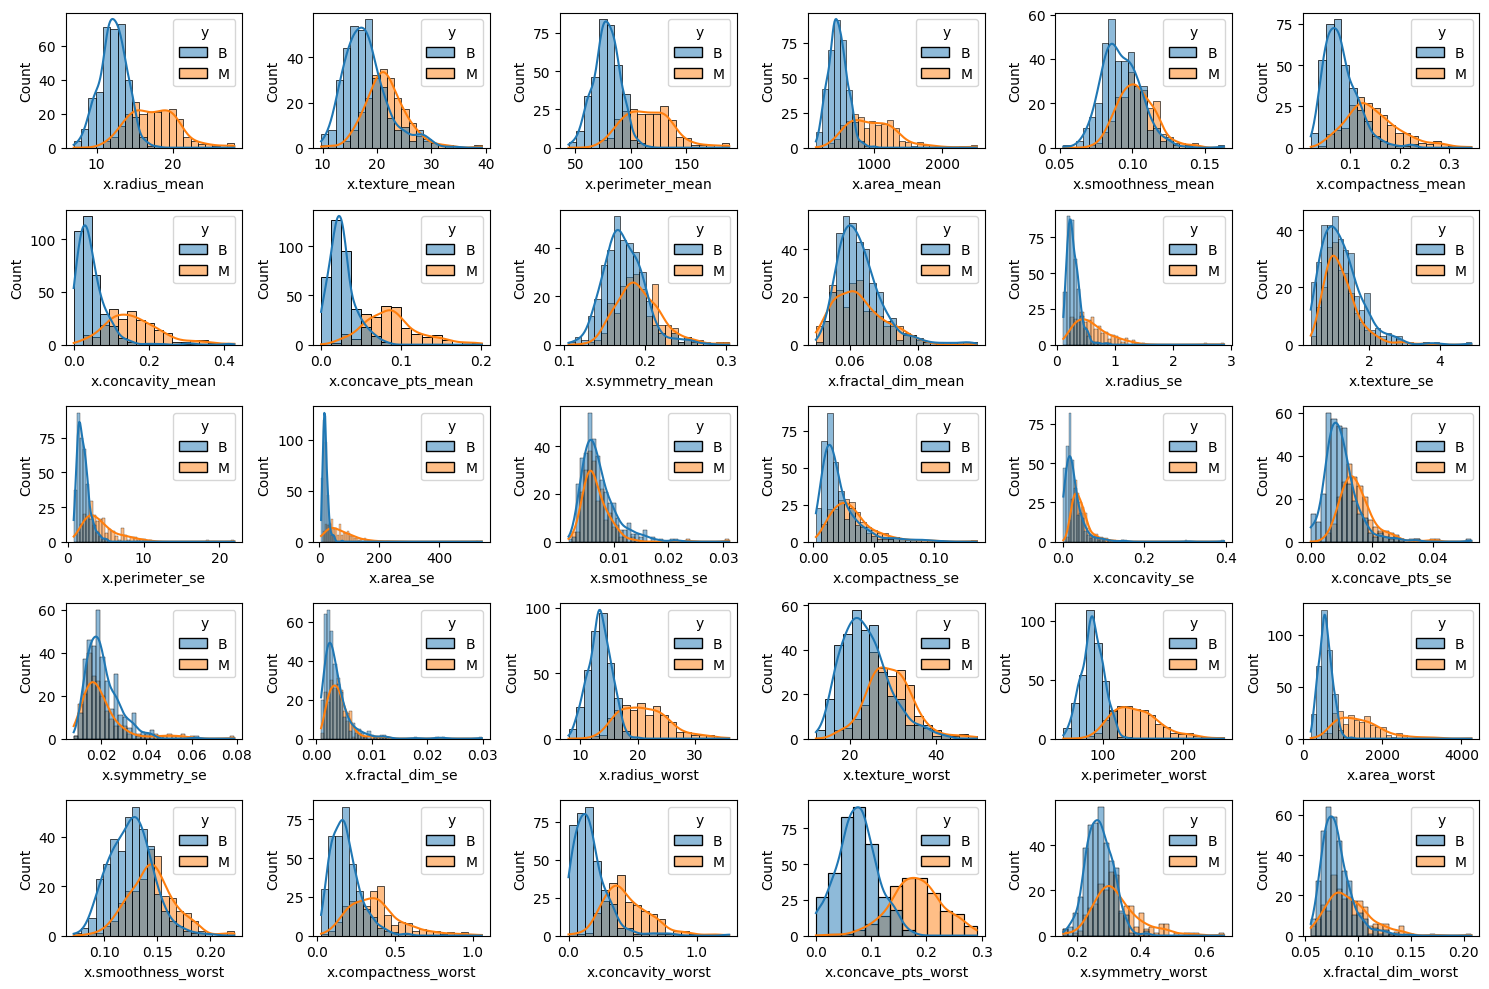

In [9]:
boxplots(df)
histplots(df, False)
histplots(df, True)

In [10]:
def outliers_removal(df, i):
    perc = np.percentile(df[i], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    _min = perc[1] - 1.5*iqr
    _max = perc[3] + 1.5*iqr
    df.loc[df[i] > _max, i] = _max
    df.loc[df[i] < _min, i] = _min
    return df

In [11]:
for i in df.columns[:-1]:
    df = outliers_removal(df, i)

# Boxplots and histograms after removing outliers

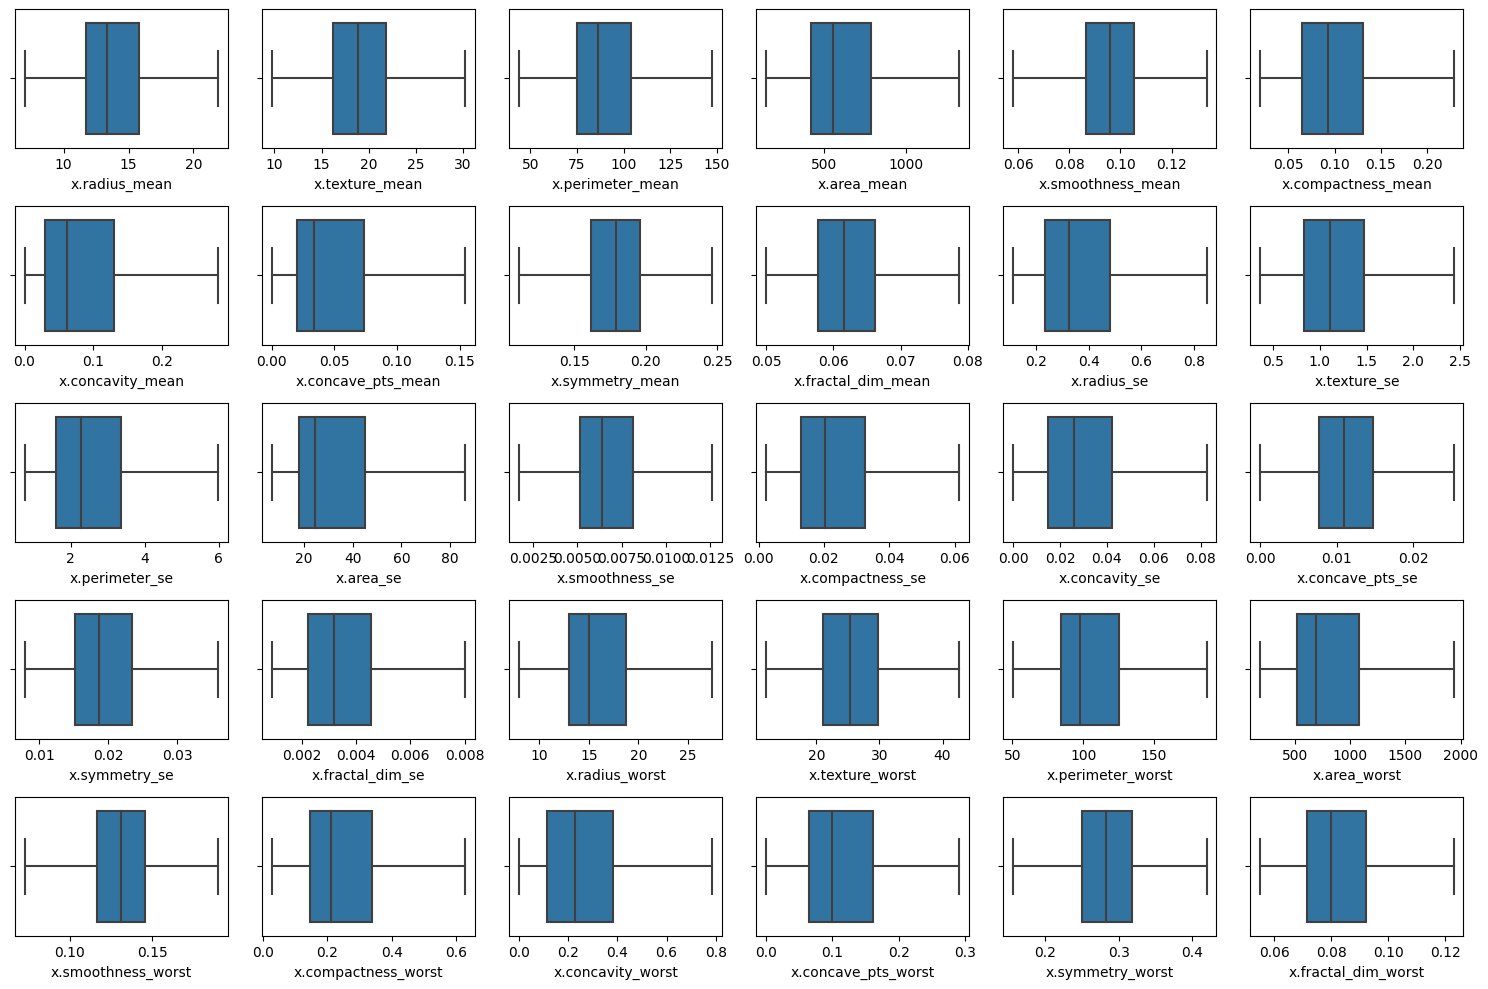

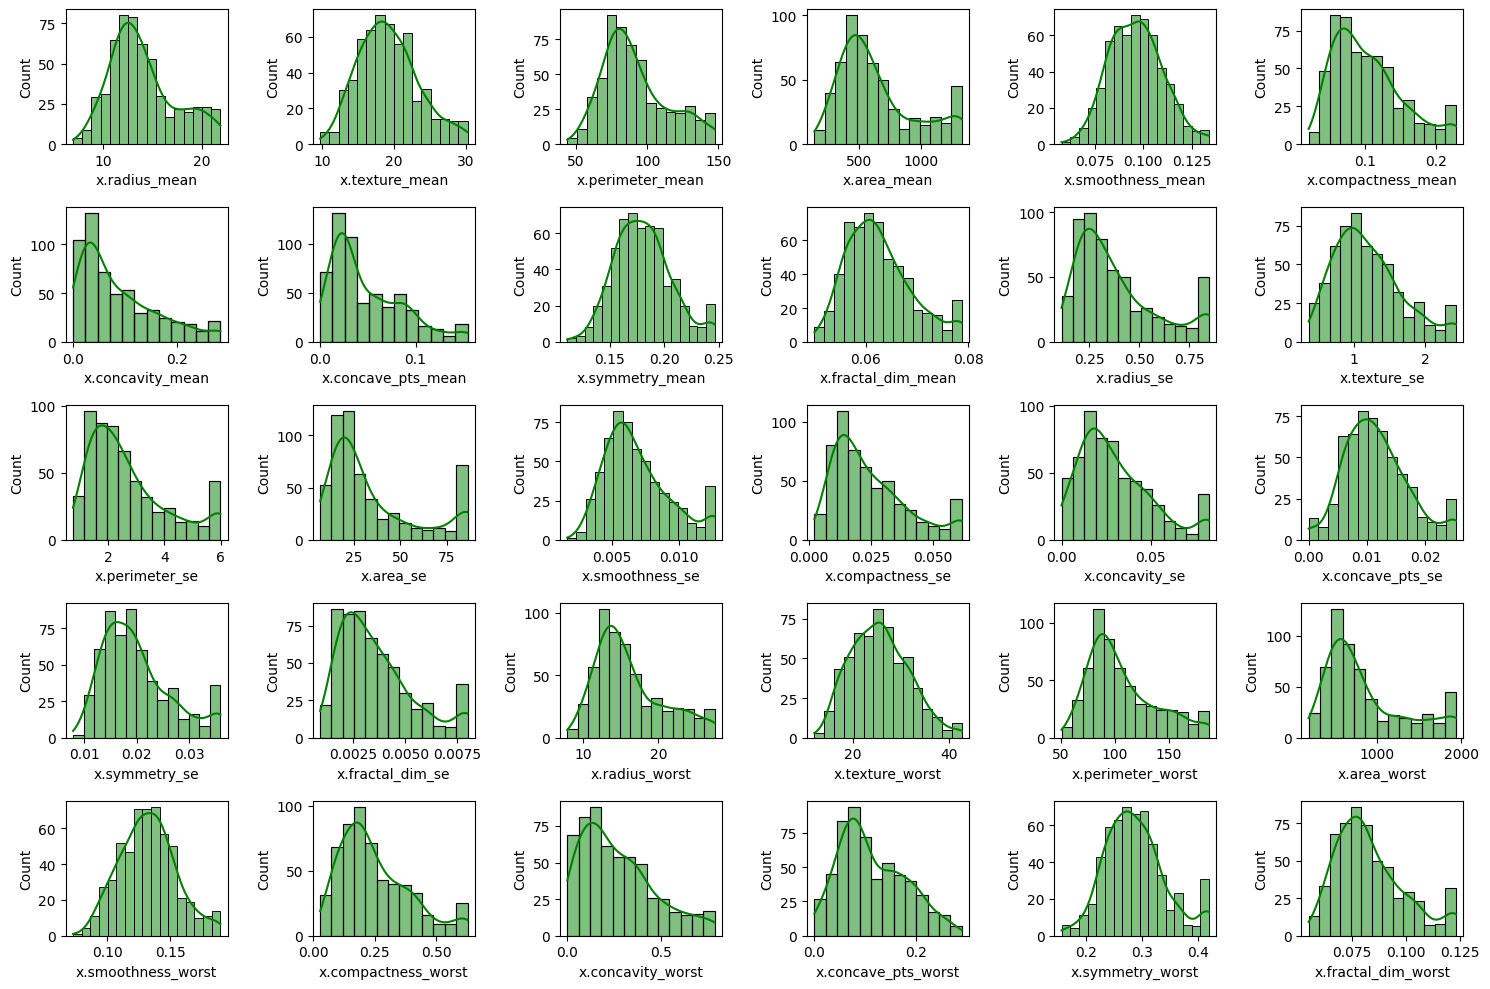

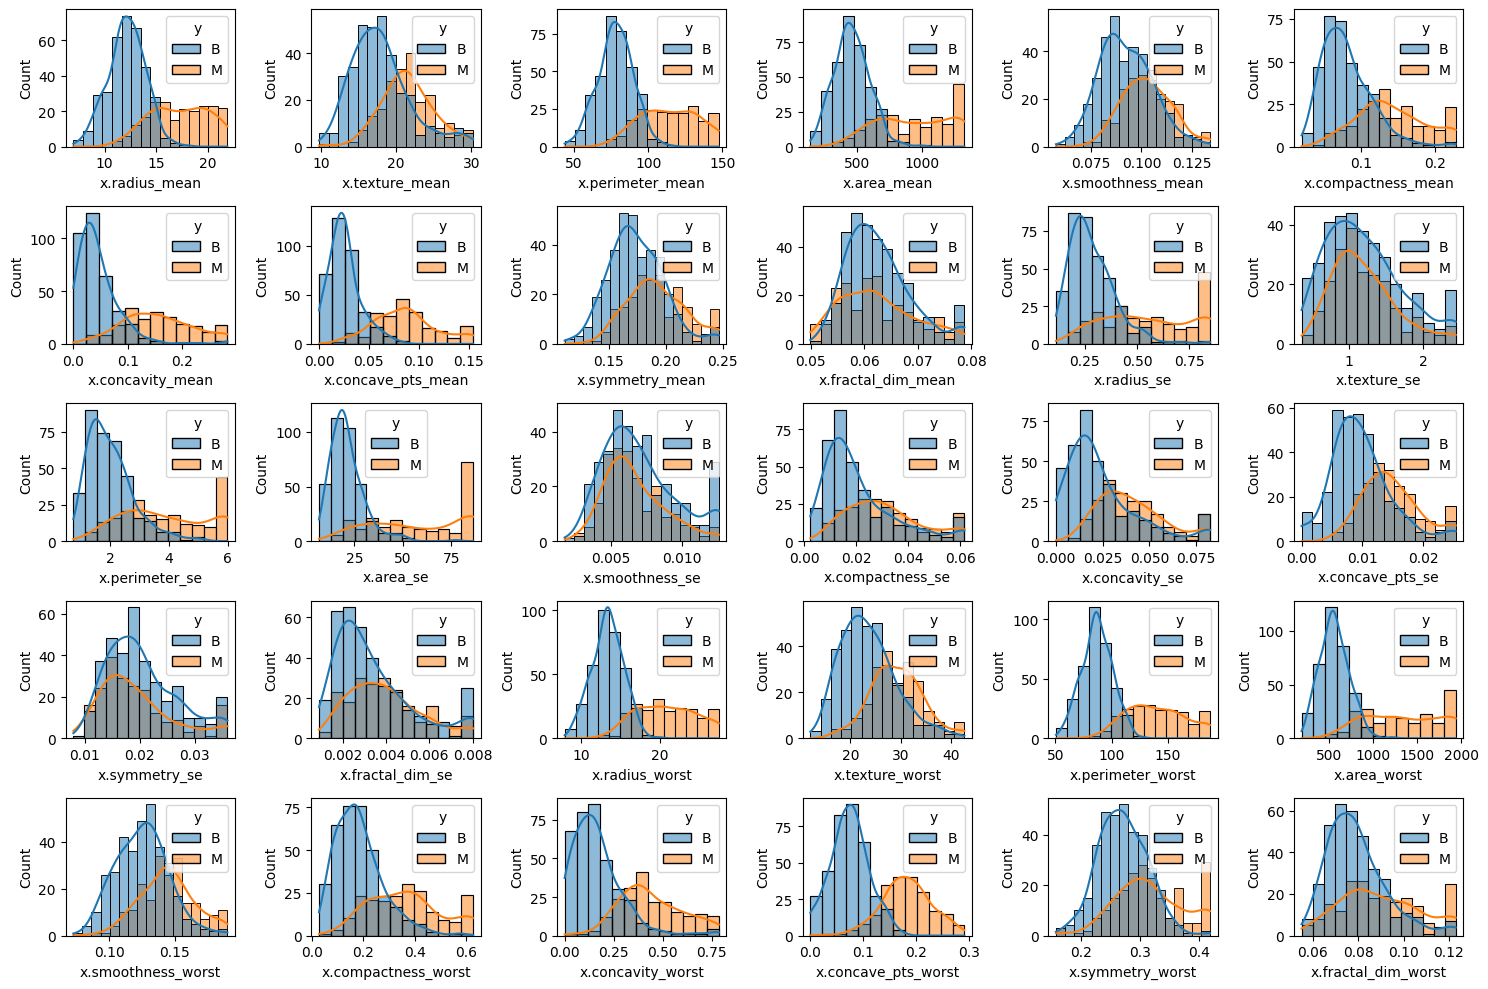

In [12]:
boxplots(df)
histplots(df, False)
histplots(df, True)

# Slight class imbalance

([<matplotlib.patches.Wedge at 0x79fa53912020>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'B'),
  Text(0.428654605109445, -1.013042560566172, 'M')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.74%'),
  Text(0.23381160278696997, -0.55256866939973, '37.26%')])

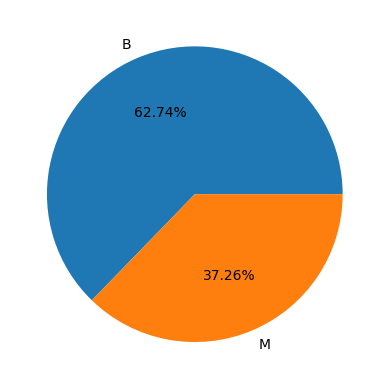

In [13]:
tumors = df[df.columns[-1]].value_counts()
plt.pie(tumors,
       labels=tumors.index,
       autopct='%0.2f%%')

In [14]:
le = LabelEncoder()
target = df.columns[-1]
df[target] = le.fit_transform(df[target])

In [15]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Applying SMOTE technique

In [16]:
sm = SMOTE()
print("Before ", Counter(y_train))
x_train, y_train = sm.fit_resample(x_train, y_train)
print("After ", Counter(y_train))

Before  Counter({0: 286, 1: 169})
After  Counter({0: 286, 1: 286})


# Training and evluation pipeline

In [17]:
def evaluate(model, name, _r=2):
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_pred, y_test)
    acc = acc*100
    acc = round(acc, _r)
    title = "{} : {}%".format(name, acc)
    print(title)
    print()

In [18]:
def training(model, name):
    model.fit(x_train, y_train)
    evaluate(model, name)
    return model

In [19]:
knn = KNeighborsClassifier(n_neighbors=10)
svc = SVC(C=0.5, kernel='linear')
abc = AdaBoostClassifier(learning_rate=0.1)
rfc = RandomForestClassifier(max_depth=70, criterion='gini')
lgr = LogisticRegression(max_iter=1000)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(criterion='gini', max_depth=50)
xgb = XGBClassifier()
models = [knn, svc, abc, rfc, lgr, gnb, dtc, xgb]
names = ['KNN', 'SVC', 'Ada Boost', 'Random Forest', 
         'Logistic Regression', 'Naive Bayes',
        'Decision Tree', 'XGBoost']

# ML Algorithms benchmarks

In [20]:
trained = []
for i, j in zip(models, names):
    trained += [training(i, j)]

KNN : 93.86%

SVC : 94.74%

Ada Boost : 94.74%

Random Forest : 94.74%



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 94.74%

Naive Bayes : 92.11%

Decision Tree : 92.98%

XGBoost : 97.37%

